In [1]:
library(ComplexHeatmap)
library(circlize)

Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

Thi

In [2]:
projdir <- '/u/project/cluo/terencew/igvf/pilot/multiome/'

In [30]:
gex_pd <- read.table(paste0(projdir, 'csv/final_figures/figure4/gex_pd_20_20_corr.csv'),
                             sep='\t', header=1, row.names=1)

atac_pd <- read.table(paste0(projdir, 'csv/final_figures/figure4/atac_pd_20_20_corr.csv'),
                             sep='\t', header=1, row.names=1)

In [37]:
gex_mux <- read.table(paste0(projdir, 'csv/final_figures/figure4/gex_mux_10_20_corr.csv'),
                             sep='\t', header=1, row.names=1)

atac_mux <- read.table(paste0(projdir, 'csv/final_figures/figure4/atac_mux_10_20_corr.csv'),
                             sep='\t', header=1, row.names=1)

In [31]:
head(gex_pd)

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,demuxalot
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
demuxlet,1.0000000,0.6638002,0.7975027,0.7894923,0.7316527,0.7328307,0.7726470,0.7694664,0.7866651
freemuxlet,0.6638002,1.0000000,0.7588644,0.7857227,0.8763105,0.8812581,0.8315467,0.8314289,0.6210390
vireo,0.7975027,0.7588644,1.0000000,0.9630110,0.8564024,0.8495700,0.9259041,0.9222523,0.8506302
vireo_nogenos,0.7894923,0.7857227,0.9630110,1.0000000,0.8790199,0.8700671,0.9494640,0.9479326,0.8291907
scsplit,0.7316527,0.8763105,0.8564024,0.8790199,1.0000000,0.9535870,0.8887973,0.8912711,0.7275297
scsplit_nogenos,0.7328307,0.8812581,0.8495700,0.8700671,0.9535870,1.0000000,0.8847921,0.8872659,0.7230534


In [32]:
head(atac_pd)

,demuxlet,freemuxlet,vireo,vireo_nogenos,souporcell,souporcell_nogenos,scsplit,scsplit_nogenos,scavengers
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
demuxlet,1.0000000,0.7436683,0.8342561,0.8295441,0.8379079,0.8480386,0.7186948,0.7176346,0.6699258
freemuxlet,0.7436683,1.0000000,0.7661680,0.8010366,0.8609966,0.8506302,0.8228295,0.8255389,0.9107080
vireo,0.8342561,0.7661680,1.0000000,0.9359171,0.8797267,0.8856167,0.8062198,0.8032748,0.6912475
vireo_nogenos,0.8295441,0.8010366,0.9359171,1.0000000,0.8964542,0.8995170,0.8175286,0.8167040,0.7261162
souporcell,0.8379079,0.8609966,0.8797267,0.8964542,1.0000000,0.9486394,0.7952645,0.7944399,0.7889033
souporcell_nogenos,0.8480386,0.8506302,0.8856167,0.8995170,0.9486394,1.0000000,0.7877253,0.7871363,0.7757097


In [38]:
# gex_names <- c('demuxlet','freemuxlet','vireo','vireo, no genotypes',
#                                'scsplit', 'scsplit, no genotypes',
#                                'souporcell','souporcell, no genotypes', 'demuxalot')
# atac_names <- c('demuxlet','freemuxlet','vireo','vireo, no genotypes',
#                                'scsplit', 'scsplit, no genotypes',
#                                'souporcell','souporcell, no genotypes','scavengers')

gex_names <- gsub('_nogenos', ', no genotypes', colnames(gex_pd))
atac_names <- gsub('_nogenos', ', no genotypes', colnames(atac_pd))

In [34]:
colnames(gex_pd) <- gex_names
rownames(gex_pd) <- gex_names
colnames(atac_pd) <- atac_names
rownames(atac_pd) <- atac_names

In [39]:
colnames(gex_mux) <- gex_names
rownames(gex_mux) <- gex_names
colnames(atac_mux) <- atac_names
rownames(atac_mux) <- atac_names

Warning message:
“The input is a data frame, convert it to a matrix.”


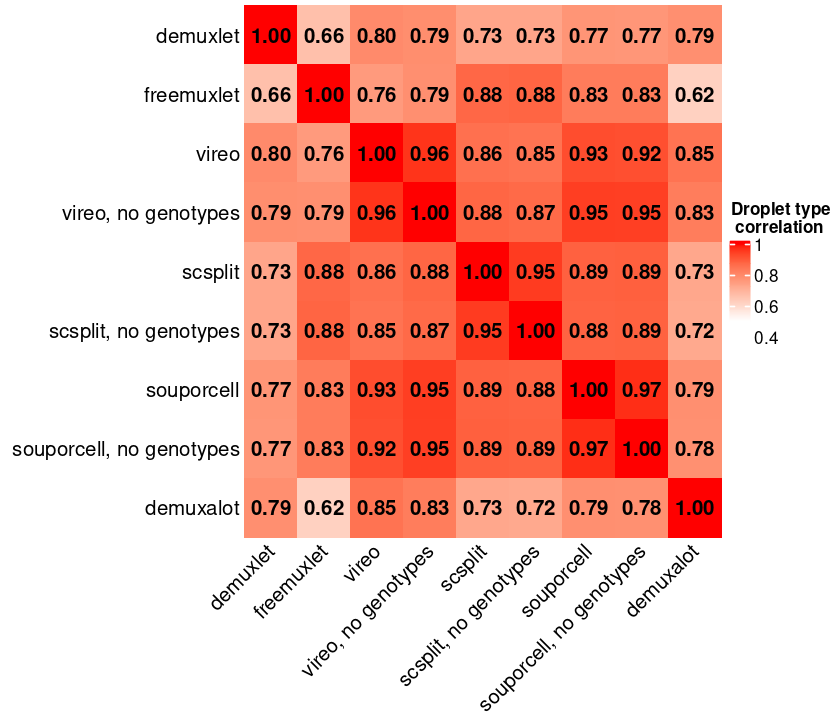

In [35]:
options(repr.plot.width=7, repr.plot.height=6)
cell_fun <- function(j, i, x, y, width, height, fill) {
        grid.text(sprintf("%.2f", gex_pd[i, j]), x, y, gp = gpar(fontsize = 12,
                                                                      fontface = 'bold'))}
gex_heatmap <- Heatmap(gex_pd,
                        name='Droplet type\n correlation',
                    row_names_side = "left",
                    column_names_side = "bottom",
                    col = colorRamp2(c(0.5, 1), c("white", "red")),
                    column_title = '',
                    row_title = '',
                    show_heatmap_legend = TRUE,
                    show_column_names=TRUE,
                    show_row_names=TRUE,
                    row_title_gp = gpar(fontsize = 22),
                    column_title_gp = gpar(fontsize = 22),
                    column_names_rot = 45,
                    cell_fun = cell_fun,
                    heatmap_width = unit(15, "cm"),
                    heatmap_height = unit(15, "cm"),
                    cluster_rows = FALSE,
                    cluster_columns = FALSE)
gex_heatmap

Warning message:
“The input is a data frame, convert it to a matrix.”


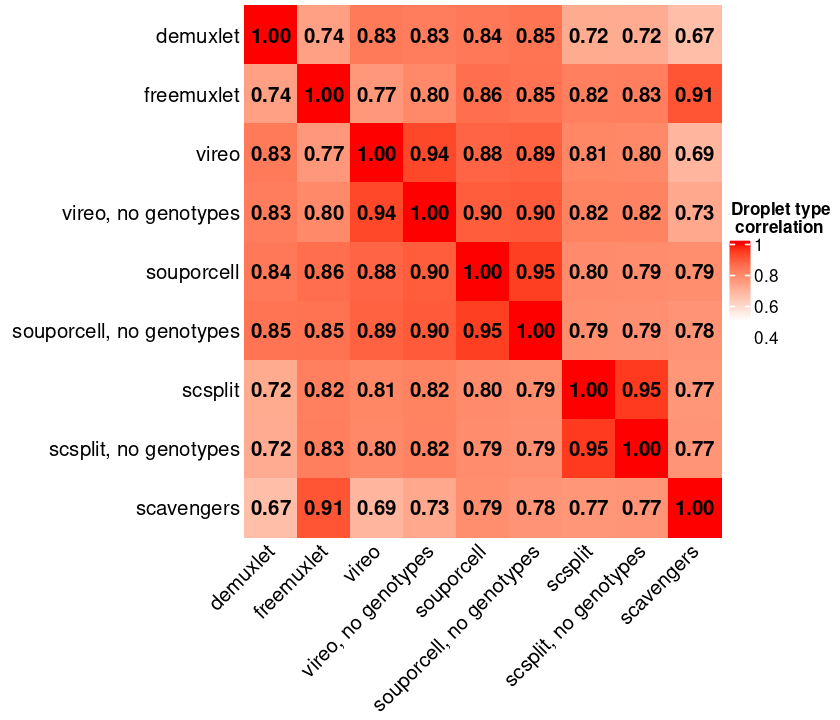

In [36]:
options(repr.plot.width=7, repr.plot.height=6)
cell_fun <- function(j, i, x, y, width, height, fill) {
        grid.text(sprintf("%.2f", atac_pd[i, j]), x, y, gp = gpar(fontsize = 12,
                                                                      fontface = 'bold'))}
atac_heatmap <- Heatmap(atac_pd,
                        name='Droplet type\n correlation',
                    row_names_side = "left",
                    column_names_side = "bottom",
                    col = colorRamp2(c(0.5, 1), c("white", "red")),
                    column_title = '',
                    row_title = '',
                    show_heatmap_legend = TRUE,
                    show_column_names=TRUE,
                    show_row_names=TRUE,
                    row_title_gp = gpar(fontsize = 22),
                    column_title_gp = gpar(fontsize = 22),
                    column_names_rot = 45,
                    cell_fun = cell_fun,
                    heatmap_width = unit(15, "cm"),
                    heatmap_height = unit(15, "cm"),
                    cluster_rows = FALSE,
                    cluster_columns = FALSE)
atac_heatmap

Warning message:
“The input is a data frame, convert it to a matrix.”


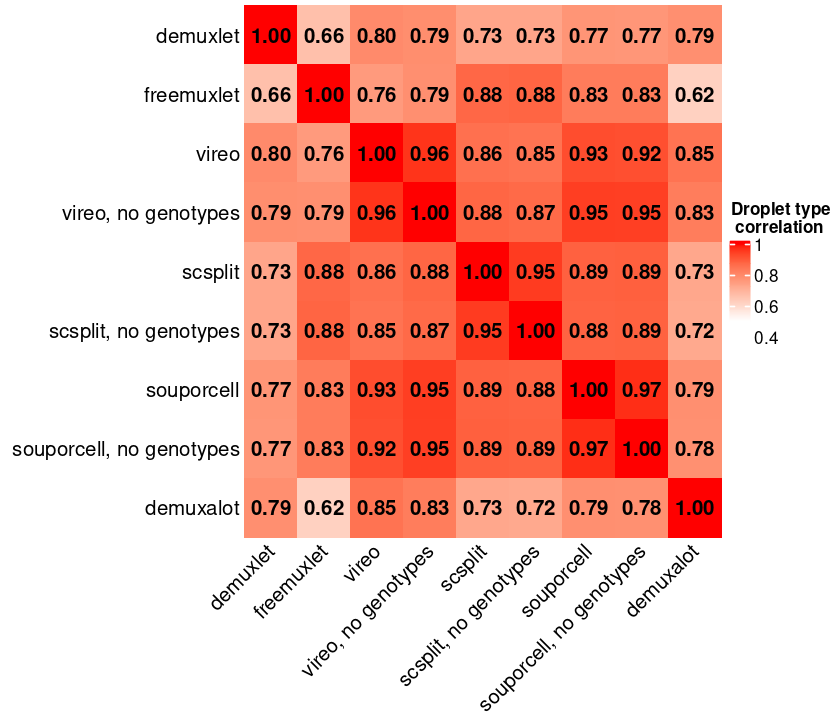

In [40]:
options(repr.plot.width=7, repr.plot.height=6)
cell_fun <- function(j, i, x, y, width, height, fill) {
        grid.text(sprintf("%.2f", gex_mux[i, j]), x, y, gp = gpar(fontsize = 12,
                                                                      fontface = 'bold'))}
gex_heatmap <- Heatmap(gex_mux,
                        name='Droplet type\n correlation',
                    row_names_side = "left",
                    column_names_side = "bottom",
                    col = colorRamp2(c(0.5, 1), c("white", "red")),
                    column_title = '',
                    row_title = '',
                    show_heatmap_legend = TRUE,
                    show_column_names=TRUE,
                    show_row_names=TRUE,
                    row_title_gp = gpar(fontsize = 22),
                    column_title_gp = gpar(fontsize = 22),
                    column_names_rot = 45,
                    cell_fun = cell_fun,
                    heatmap_width = unit(15, "cm"),
                    heatmap_height = unit(15, "cm"),
                    cluster_rows = FALSE,
                    cluster_columns = FALSE)
gex_heatmap

Warning message:
“The input is a data frame, convert it to a matrix.”


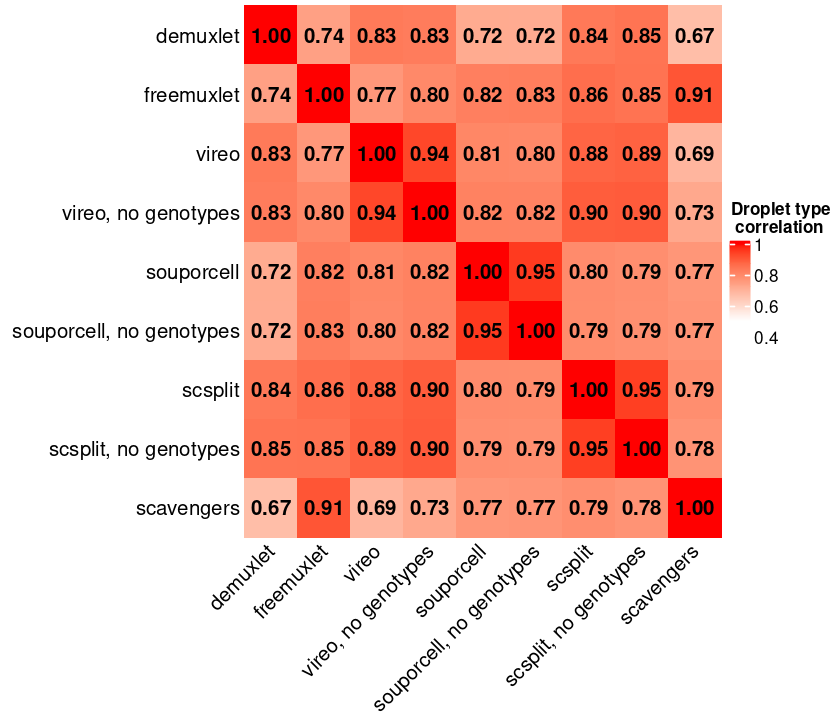

In [41]:
options(repr.plot.width=7, repr.plot.height=6)
cell_fun <- function(j, i, x, y, width, height, fill) {
        grid.text(sprintf("%.2f", atac_mux[i, j]), x, y, gp = gpar(fontsize = 12,
                                                                      fontface = 'bold'))}
atac_heatmap <- Heatmap(atac_mux,
                        name='Droplet type\n correlation',
                    row_names_side = "left",
                    column_names_side = "bottom",
                    col = colorRamp2(c(0.5, 1), c("white", "red")),
                    column_title = '',
                    row_title = '',
                    show_heatmap_legend = TRUE,
                    show_column_names=TRUE,
                    show_row_names=TRUE,
                    row_title_gp = gpar(fontsize = 22),
                    column_title_gp = gpar(fontsize = 22),
                    column_names_rot = 45,
                    cell_fun = cell_fun,
                    heatmap_width = unit(15, "cm"),
                    heatmap_height = unit(15, "cm"),
                    cluster_rows = FALSE,
                    cluster_columns = FALSE)
atac_heatmap